In [2]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 13.7 MB/s 


In [3]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A continuación se importa el inventario de movimientos en masa, así como los mapas de las variables predictoras a utilizar:

(548839,)

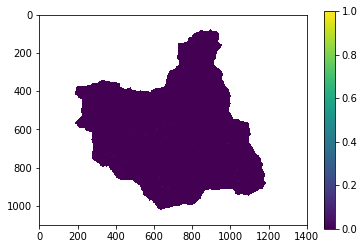

In [4]:
raster = rio.open('https://github.com/dahiginioj/Cartograf-a-Geotecnica-2022-ll/blob/main/Taller4/Inventario.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/dahiginioj/Cartograf-a-Geotecnica-2022-ll/blob/main/Taller5/Pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

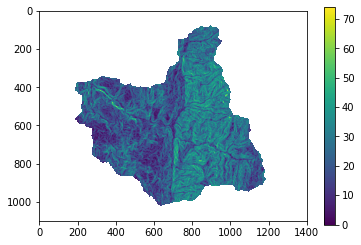

In [5]:
raster = rio.open('https://github.com/dahiginioj/Cartograf-a-Geotecnica-2022-ll/blob/main/Taller5/Pendiente1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente);
plt.colorbar();
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]

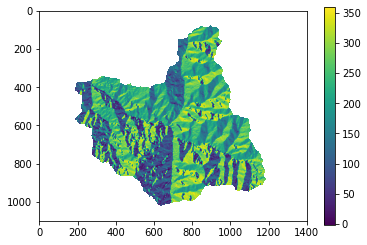

In [6]:
raster = rio.open('https://github.com/dahiginioj/Cartograf-a-Geotecnica-2022-ll/blob/main/Taller5/Aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-1,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()

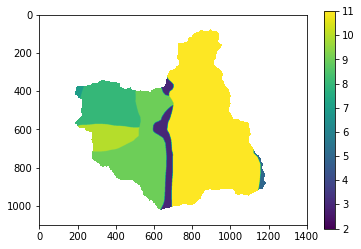

In [7]:
raster = rio.open('https://github.com/dahiginioj/Cartograf-a-Geotecnica-2022-ll/blob/main/Taller5/MapaGeo.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia>11,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar();

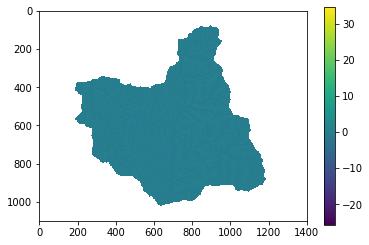

In [8]:
raster = rio.open('https://github.com/dahiginioj/Cartograf-a-Geotecnica-2022-ll/blob/main/Taller5/Curvatura1.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-25.6,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()

## Multivariados
A diferencia de los métodos estadísticos bivariados, que combinan el inventario de movimientos en masa con cada variable por separado, los métodos estadísticos multivariados evalúan la relación combinada entre la variable dependiente (la ocurrencia de movimientos en masa) y todas variables independientes (variables predictoras) en simultanea. Entre estos métodos se encuentra la regresión logística, la cual ha sido el método mas utilizado alrededor del mundo para evaluar la susceptibilidad por movimientos en masa; al igual que el método de análisis discriminante lineal, el cual es el exigido en los estudios de amenaza en los Planes de Ordenación y Manejo de Cuencas (POMCA) en Colombia. 

Adicionalmente como parte de los métodos multivariados, con la explosión de la era de los datos, se encuentran disponibles técnicas de aprendizaje automático de máquinas (*machine learning*), especificamente los métodos supervisados de clasificación binarios, entre los cuales se encuentran regresión logística y análisis discriminante, pero adicionalmente algoritmos como *support vector machine*, métodos ensamblados tipo *bagging* como *random forest*, tipo boosting como *XGBoost*, y técnicas de *deep learning* como redes neuronales artificiales. 

:::{figure-md} ml
<img src="https://miro.medium.com/max/477/1*KFQI59Yv7m1f3fwG68KSEA.jpeg" alt="ml" width="500px">

Algoritmos utilizados en *machine learning*
:::

Existen métodos paramétricos y no-paramétricos. Los modelos paramétricos simplifican el aprendizaje a partir de los datos de entrenamiento, ya que utilizan una función conocida que generalmente corresponde a una combinación lineal de las variables predictoras. Por lo que como resultado siempre se obtiene los coeficientes de la función predeterminada. Estos modelos además de no exigir una gran capacidad computacional, son muy estables sin presentar problemas de varianza. Sin embargo, en muchos casos el problema a modelar no se ajusta a una función lineal, por lo que pueden presentar problemas de ajuste o sesgo. Para estos casos se recomienda el uso de modelos no paramétricos, ya que no asumen ninguna forma previa de la función objetivo, permitiendo aprender en teoría a partir de los datos de entrenamiento cualquier forma de la función. Generalmente no presentan problemas de ajuste o sesgo, pero en su defecto tienden a sobre ajustarse a los datos, generando problemas de varianza ante nuevas observaciones. En este sentido, un buen modelo se soporta en un balance entre el ajuste y la varianza, desafortunadamente mejorar en uno de estos aspectos implica generalmente reducción en el otro.

Entre las limitaciones que presentan los métodos estadísticos multivariados se encuentra que los resultados implican que los movimientos en masa ocurren por la misma combinación de factores a lo largo del área de estudio. Esta generalización ignora el hecho que la ocurrencia de ciertos tipos de movimientos en masa están controlados por ciertos factores de causa que deben ser analizados o investigados individualmente.

A continuación se describen cada uno de los métodos mas comúnes. Inicialmente se describe el método denominado *análisis condicional*, el cual es el único de los métodos que no se considera una técnica de *machine learning*. Posteriormente se procederá a presentar los métodos de *machine learning* utilizados para evaluar la susceptibilidad por movimientos en masa.

### Método de análisis condicional
El método de análisis condicional, o también denominado *matrix assessment* fue desarrollado por {cite:t}`Clerici2002`, y no requiere asunciones de aleatoriedad del fenómeno bajo análisis. En general es utilizado por su simpleza conceptual y matemática, sin embargo desde el punto de vista procedimental puede ser demandante.

Se fundamente en el uso de la unidad de análisis denominada Unidad de Condiciones Unicas (UCU). El procedimiento es el siguiente: (i) elaborar el mapa de UCU a partir de las variables predictoras seleccionadas, (ii) se cruza el mapa de UCU con el inventario de movimientos en masa, (iii) se calcula para cada UCU el porcentaje de área con movimientos en masa, (iv) finalmente, se clasifican de acuerdo con el porcentaje de área afectada. Ese porcentaje, que corresponde a una densidad relativa, es equivalente a la probabilidad futura de la ocurrencia de movimientos en masa.

:::{figure-md} metodo ucu
<img src="https://i.pinimg.com/564x/cc/6d/00/cc6d00fc1e76c817cac53b08377c25b2.jpg" alt="metodo ucu" width="500px">

Método de análisis condicional. Tomado de Urquia et al., (2020).
:::


### Regresión logística
El método estadístico multivariado denominado regresión logística (RL) estima la relación de una variable dependiente categórica (la ocurrencia de movimientos en masa) de valores binarios de 0 (no ocurrencia) y 1 (si ocurrencia), con un grupo de variables independientes, en este caso las variables condicionantes del terreno. De esta forma, la RL se utiliza para clasificar a qué grupo, ocurrencia=1 ó no-ocurrencia=0, pertenece una observación en función de diferentes variables predictoras. Para esto la RL estima la probabilidad de *y* de pertenecer a cada grupo transformando la combinación lineal de las variables predictoras (*x*) mediante la función *logit* o *sigmoid*. Lo que le permite transformar los valores arrojados por la combinación lineal a un dominio entre 0 y 1. La función *logit* se define como el logaritmo natural de la relación entre la probabilidad de ocurrencia y la probabilidad de no ocurrencia, también denominada *odds*

$P(y/x) = \frac{1}{1+e^{-z}}$
			
$\frac{p(y/x)}{1-p(y/x)} = e^{a+\sum bx}$
						
$Ln(\frac{p(y/x)}{1-p(y/x)}) = a+\sum bx$

Donde $P(y/x)$ es la probabilidad que *y* sea igual a 1, es decir la ocurrencia de movimientos en masa, dado la combinación lineal de las variables independientes:

$z=\beta_o+\beta_1X_1+\beta_2X_2+\beta_3X_3+...+\beta_nX_n$

Donde $\beta_0$ es el intercepto del modelo, los valores $\beta_i$ (i=1,2, 3, n) son los coeficientes de la regresión logística, es decir, los pesos de las variables, y los valores $X_i$ (i=1, 2, 3,..., n) son las variables independientes. El resultado final es un valor entre 0 y 1, donde 0 es la probabilidad nula de ocurrencia de movimientos en masa y 1 la máxima probabilidad de ocurrencia. De acuerdo con esto, a pesar de que el modelo transformado es lineal en las variables, las probabilidades no son lineales.

La ventaja de la RL es que las variables predictoras no requieren tener distribución normal y pueden ser discretas o continuas, o una combinación de ambas. Sin embargo, para incorporar variables categóricas se deben transformar a variables binarias todas las clases, es decir una nueva variable por cada clase. El modelo en este caso elimina una clase, que pasa a ser la clase referente, y arroja un coeficiente para las demas clases. Es decir que los coeficientes de las clases se interpretan con respecto a la clase faltante. Esta eliminación de una clase se realiza con el objeto de evitar la multicolinealidad entre variables, ya que todas las clases sumadas dan como resultado un vector constante igual a 1, es decir que se correlacionan perfectamente.


:::{figure-md} rl0
<img src="https://i0.wp.com/www.jacobsoft.com.mx/wp-content/uploads/2018/10/grafica-sigmoi.png?resize=800%2C420&ssl=1" alt="rl0" width="600px">

Función logística.
:::

A continuación se presenta un ejemplo de la estimación del coeficiente de la regresión logística para un problema de la ocurrencia o no de movimientos en masa dada dado una sola variable, la pendiente, clasificada en dos clases, pendientes $<20°$ y pendientes $>20°$. 

:::{figure-md} rl1
<img src="https://i.pinimg.com/564x/59/ce/fe/59cefecb396127fa7252a395c30eb23f.jpg" alt="rl1" width="500px">

Ejemplo 1 regresión logística.
:::

El coeficiente estimado es $-0.46$, el cual se obtiene a partir del logaritmo natural de la relación entre los *odds* de la clase pendientes $>20°$ con respecto a la ocurrencia de movimientos en masa y los *odds* de clase pendientes $<20°$. Los *odds* para cada clase de pendiente corresponde a la probabilidad de ocurrencia de movimientos en masa en dicha clase sobre la probabilidad de no ocurrencia.

En el siguiente ejemplo se presentan los resultados tanto para el coeficiente de la pendiente como el intercepto, lo que permite construir la combinación lineal y estimar la probabilidad de ocurrencia de un movimiento en masa cuando la pendiente es $>20°$ o cuando es $<20°$. Para estimar esta probabilidad solo se debe reemplazar en la función *sigmoid* el valor de *x* por 1, cuando la pendiente es $>20°$, o por el valor de 0 cuando la pendiente es $<20°$.

:::{figure-md} rl2
<img src="https://i.pinimg.com/564x/61/e3/8f/61e38fb081e8b0638a090514b2550f6b.jpg" alt="rl2" width="500px">

Ejemplo 2 regresión logística.
:::

Como se puede observar, cuando se aplica la función *e* al coeficiente de la pendiente se obtiene los *odds*, es decir la probabilidad de ocurrencia de movimientos en masa dado que la pendiente sea $>20°$  sobre la probabilidad de ocurrencia de movimientos en masa dado que la pendiente sea $<20°$. En este caso que el valor obtenido es 0.63 significa que es mas probale la ocurrencia para celdas con pendiente $<20°$.

#### *Python*

A continuación se implementará el método de RL para evaluar la susceptibilidad por movimientos en masa. En este ejemplo sólo se utilizarán tres variables (*pendiente*, *aspecto* y *geologia*).

El primer paso es crear un *Dataframe* con todas las variables y el inventario. A partir de este *Dataframe* se construye un vector con la variable *y* (ocurrencia o no de movimientos en masa), que permitirá entrenar el modelo de *RL*, y otro *Dataframe* con solo las variables predictoras.

In [69]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
df.head()

,inventario,pendiente,curvatura
0,0.0,5.878250,1.92
1,0.0,7.253561,1.92
2,0.0,14.880050,2.56
3,0.0,8.878142,-0.00
4,0.0,9.365159,3.20


Lo primero que se recomienda es normalizar los valores. La RL es un algoritmo geometrico sensible a las unidades de cada variable.

In [70]:
var_names2=['pendiente','curvatura']
for var in var_names2:
    df[var]=(df[var]-df[var].mean())/df[var].std()
df.head()

,inventario,pendiente,curvatura
0,0.0,-1.725457,1.156851
1,0.0,-1.596583,1.156851
2,0.0,-0.881938,1.542450
3,0.0,-1.444350,0.000054
4,0.0,-1.398714,1.928050


Existen dos librerias que nos permiten resolver este modelo, *statsmodels* y *sklearn*. La primera de ellas nos ofrece un resumen con los resultados y métricas de desempeño del modelo y utilizar la libreria Patsy que permite el uso de formulas.

In [71]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ pendiente + curvatura", data = df).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.001327
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               548839
Model:                          Logit   Df Residuals:                   548836
Method:                           MLE   Df Model:                            2
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                0.007026
Time:                        02:23:51   Log-Likelihood:                -728.29
converged:                       True   LL-Null:                       -733.45
Covariance Type:            nonrobust   LLR p-value:                  0.005779
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9629      0.120    -74.784      0.000      -9.198      -8.728
pendiente      0.0361      0

La librearia *statsmodels* incorpora por defecto el intercepto en el modelo y en las formulas pueden especificar el tipo de variables categóricas con una *C*. Como se menciono anteriormente las clases de las variables categoricas son transformadas en variables binarias, eliminando una. En este caso se elimino la clase 2 de *geologia*, por lo que los coeficientes de las demas clases son con respecto a dicha clase. Entre los resultados se destacan el estimador para los coeficientes (maxima verosimilitud -MLE-), el logaritmo del estimador MLE (Log-likelihood), el coeficiente de ajuste (Pseudo R-squ.). Con respecto a los coeficientes se presenta el valor de la prueba de hipotesis nula que el valor del coeficiente es igual a cero (z) como el valor del coeficiente entre el error estandar (std err), y el *p-value* (P>|z|), este valor debe ser menor al 5% (0.05), lo cual significa que la probabilidad que el coeficiente tenga un valor de 0 es muy bajo.  Finalmente se presenta el rango del 95% del dominio del valor del coeficiente.

La libreria  *scikit learn* permite parametrizar el modelo de diferentes formas, sin embargo requiere ingresar entre variables dependientes y variables independientes. Asi como transformar la variable categorica.

In [72]:
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,pendiente,curvatura
0,-1.725457,1.156851
1,-1.596583,1.156851
2,-0.881938,1.542450
3,-1.444350,0.000054
4,-1.398714,1.928050


Inicialmente, se importa la función para RL, y se construye el modelo con los hiperparámetros. En este caso, estamos asignándole un *class_weight* = balanced para que asigne mas peso a las celdas minoritarias, en este caso las celdas donde y=1. De esta forma RL nos ayuda a resolver el problema de la base de datos original  desbalanceada. El segundo hiperparámetro que utilizamos es el tipo de algoritmo para resolver la RL, en este caso utilizaremos *newton-cg*. La librera "skilearn" utiliza por defecto el hiperparametro *fit_intercept* con un valor de *True* que equivale a incluir el intercepto.

In [73]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

Luego de tener el modelo construido, se le asignan los datos con la función *fit*, en este caso, primero la matriz con las variables predictoras, y luego la variable *y*. De esta forma el modelo se entrena con los datos y se pueden obtener los resultados de los valores de los coeficientes con la función *coef_*

In [77]:
result=model.fit(X,y)
print(result.coef_)

[[0.08303078 0.4390878 ]]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Con el modelo entrenado y guardado en la varible *result* podemos entonces obtener los valores que predice el modelo para toda la matriz con las variables predictoras. Para eso se utiliza la función *predict*. Esta función clasifica cada celda como inestable (1) o estable (0).

In [78]:
y_pred=result.predict(X)
y_pred

array([1., 1., 1., ..., 1., 0., 0.])

Sin embargo, tambien se puede obtener los resultados del modelo antes de clasificarlo como (0,1). es decir la probabilidad de cada celda de ser 0 o de ser 1. Para eso se utiliza la función *predict_proba*. La cual puede ser mas útil para nuestro mapa.

In [79]:
y_prob=result.predict_proba(X)
y_prob

array([[0.43131799, 0.568682  ],
       [0.42869532, 0.5713047 ],
       [0.3738289 , 0.6261711 ],
       ...,
       [0.48810798, 0.511892  ],
       [0.5800314 , 0.41996863],
       [0.5865172 , 0.4134828 ]], dtype=float32)

como se puede observar el resultado en este caso, en lugar de ser un vector con la clasificacion de cada celda, es un matriz de dos columnas. Donde la primera columna es la probabilidad de cada celda de ser 0, es decir estable, y la segudna columna la probabilidad de ser 1, es decir inestable. Para nuestro propósito es mas útil obtener la probabilidad de cada celda de ser inestable. Para eso seleccionamos entonces solo la segunda columna de la matriz obtenida.

In [80]:
y_probs=result.predict_proba(X)[:,1]
y_probs

array([0.568682  , 0.5713047 , 0.6261711 , ..., 0.511892  , 0.41996863,
       0.4134828 ], dtype=float32)

Ya tenemos los resultados y la predicción para todas las celdas. Sin embargo esto lo tenemos para un vector que construimos la principio que solo contiene las celdas dentro de la cuenca, es decir eliminó todas las celdas por fuera. Eso nos impide construir nuestra cuenca a partir de este vector.

Una forma de resolver esto se presenta a continuación. Existen muchas formas, seguramente otras mas directas.

Para este caso construiremos entonces un nuevo *Dataframe*, pero en este caso con el vector completo, sin eliminar las celdas por fuera de la cuenca, y las celdas por fuera de la cuenca, en lugar de tener un valor de NaN les daremos un valor de 0. Las funciones de *sklearn* no corren cuando encuentra dentro de los valores NaN.

De igual forma, hay que transformar las variables categóricas a variables tipo *dummy* y en este caso debemos eliminar un anueva columna que se forma con el intercepto y que denomina *0.0*

In [81]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)


In [82]:
f={'pendiente':pendiente_vector2,'curvatura':curvatura_vector2}
x_map=pd.DataFrame(f)

Como se puede observar, tenemos ahora una matriz con todas las variables y con un número mayor de celdas.

Con esta matriz podemos entonces obtener para cada celda la probabilidad que se inestable.

In [83]:
y_pred=model.predict_proba(x_map)[:,1]

Ya lo unico que nos queda es reconstruir a partir de dicho vector la matriz que conforma la cuenca con los valores de susceptibilidad. Para eso utilizaremos como máscara el mapa de pendiente.

In [84]:
raster = rio.open('https://github.com/dahiginioj/Cartograf-a-Geotecnica-2022-ll/blob/main/Taller5/Pendiente1.tif?raw=true')
pendiente=raster.read(1)

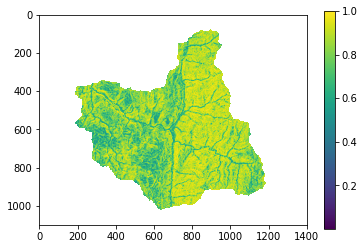

In [85]:
IS_M=y_pred.reshape(pendiente.shape)
IS_M=np.where(pendiente<0,np.nan,IS_M)
plt.imshow(IS_M)
plt.colorbar();

In [86]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS_M.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS_M,1);